<a href="https://colab.research.google.com/github/ClauderCarvalho/Corrida-de-Grafico_COVID-19/blob/master/GRAFICO_CORRIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clauder Noronha

* Base de Dados = Covid-19

* Data = 27/05/2020 

Estudo de caso do Covid-19 em relação ao crescimento por dia entre todos os paises.



Para esta corrida no gráfico de barras, usaremos um pequeno conjunto 


de dados produzido pela John Hopkins University contendo o total de 

mortes por data em seis países durante a pandemia de coronavírus 

atualmente em andamento. 

 

>  Vamos ler agora.





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**O que é uma corrida de gráfico de barras?**

Uma corrida de gráfico de barras é uma sequência animada de barras que 

mostra valores de dados em diferentes momentos no tempo. As barras se 

reposicionam a cada período de tempo para que permaneçam em ordem 

(ascendente ou descendente).




**Transição de barras sem problemas entre períodos**

O truque para fazer um gráfico de barras disparar é fazer a transição lenta das barras para a nova posição quando a ordem delas mudar, permitindo que você acompanhe facilmente os movimentos.
Dados de mortes de COVID-19





In [0]:
df = pd.read_csv('/content/drive/My Drive/GRAFICO_CORRIDA/covid19.csv',index_col=['date'],parse_dates=['date'])

In [8]:
df.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,2746.0,2.0,NaN,NaN,NaN,26.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,2790.0,2.0,NaN,NaN,NaN,34.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,2837.0,2.0,NaN,NaN,NaN,43.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-03-01,NaN,NaN,NaN,2872.0,2.0,NaN,NaN,NaN,54.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


Gráficos de barras individuais para datas específicas

Vamos começar criando um único gráfico de barras estático para a data 

específica de 29 de março de 2020. Primeiro, selecionamos os dados como uma 
série.

In [9]:
s = df.loc['2020-03-29']
s

Belgium             431.0
Brazil              136.0
Canada               64.0
China              3304.0
France             2611.0
Germany             533.0
India                27.0
Indonesia           114.0
Iran               2640.0
Ireland              46.0
Italy             10779.0
Mexico               16.0
Netherlands         772.0
Portugal            119.0
Spain              6803.0
Sweden              110.0
Switzerland         300.0
Turkey              131.0
USA                2566.0
United Kingdom     1231.0
Name: 2020-03-29 00:00:00, dtype: float64

Faremos um gráfico de barras horizontais usando os nomes dos países como 

valores y e o total de mortes como valores x (largura das barras). Cada barra 

terá uma cor diferente do mapa de cores 'Dark2'.

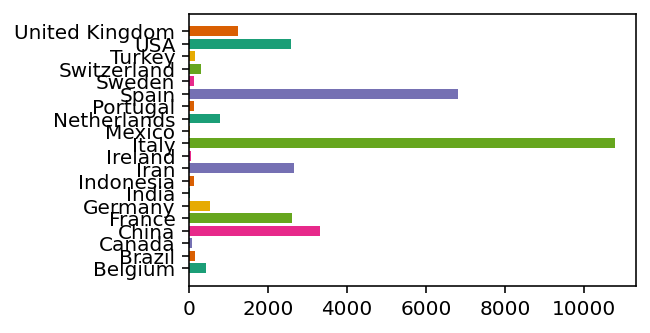

In [10]:
fig, ax = plt.subplots(figsize = (4, 2.5), dpi = 144 )
colors = plt.cm.Dark2 (range(6))
y = s.index
width = s.values
ax.barh (y = y, width = width, color= colors);

A função abaixo altera várias propriedades dos eixos para torná-la mais agradável.

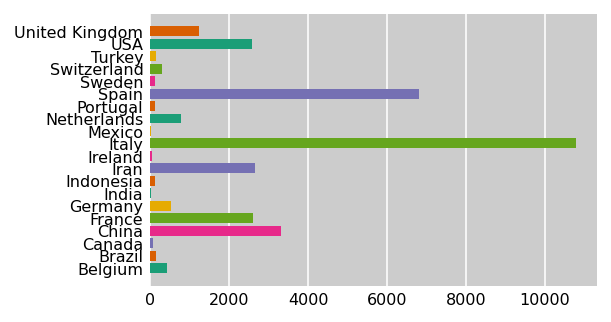

In [11]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

**Traçar três dias consecutivos pedindo as barras**

Para uma corrida no gráfico de barras, as barras geralmente são ordenadas do 

maior para o menor, com o maior no topo. Aqui, plotamos três dias de dados, 

classificando cada um primeiro.

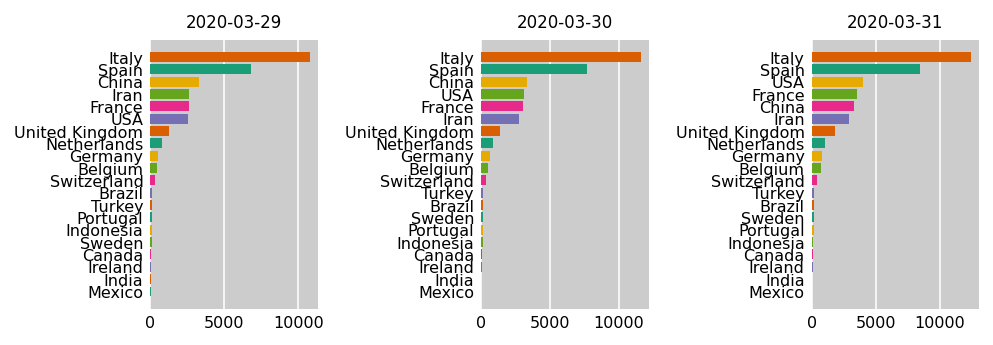

In [12]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
  s = df.loc[date].sort_values()
  ax.barh(y=s.index, width=s.values, color=colors)
  ax.set_title(date, fontsize='smaller')
  nice_axes(ax)

**Países mudam de cor**



Embora as barras sejam ordenadas corretamente, os países não mantêm a cor 

original ao trocar de lugar no gráfico. Observe que os EUA começam como a 

quinta barra e sobem uma posição a cada data, mudando de cor a cada vez. Isso 

ocorre devido à mudança de posição na série durante a classificação.

Não classifique - classifique!

Em vez de classificar, use o rankmétodo para encontrar a classificação numérica 

de cada país para cada dia. Usamos o 'first'método de classificação para que 

cada classificação numérica seja um número inteiro único. Por padrão, o método 

é o 'average'que classifica os vínculos com o mesmo valor, causando barras 

sobrepostas. Vamos ver o ranking de 29 de março de 2020.

In [13]:
df.loc['2020-03-29'].rank(method='first')

Belgium           11.0
Brazil             9.0
Canada             4.0
China             18.0
France            16.0
Germany           12.0
India              2.0
Indonesia          6.0
Iran              17.0
Ireland            3.0
Italy             20.0
Mexico             1.0
Netherlands       13.0
Portugal           7.0
Spain             19.0
Sweden             5.0
Switzerland       10.0
Turkey             8.0
USA               15.0
United Kingdom    14.0
Name: 2020-03-29 00:00:00, dtype: float64

Agora usamos essa classificação como valores-y. A ordem dos dados na série nunca muda dessa maneira, garantindo que os países permaneçam da mesma cor, independentemente de sua classificação.

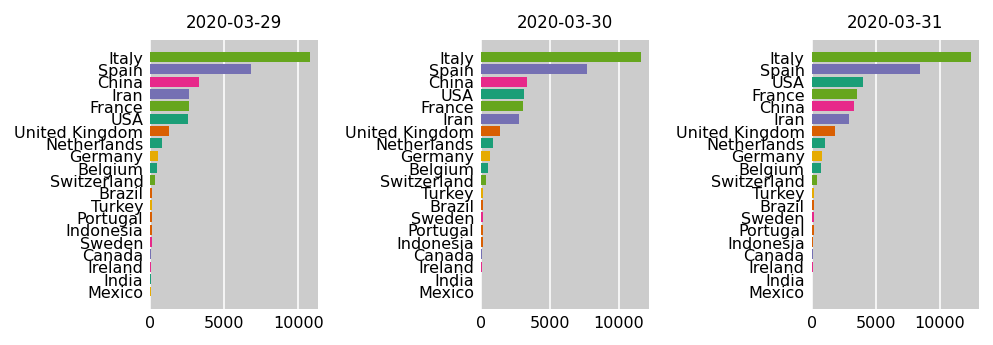

In [14]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first').values
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

**Como fazer a transição sem problemas?**


Usar cada dia como um único quadro em uma animação não funcionará bem, pois não 

captura a transição de um período para o próximo. Para fazer a transição das 

barras que mudam de posição, precisamos adicionar linhas extras de dados entre 

as datas que temos. Vamos primeiro selecionar as três datas acima como um 

DataFrame.

In [15]:
# Vamos criar uma nova classe

df2 = df.loc['2020-03-29':'2020-03-31']

df2

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


É mais fácil inserir um número exato de novas linhas ao usar o índice padrão -números inteiros começando em 0. 



Como alternativa, se você tiver uma data e hora no índice, como fazemos aqui, poderá usar o asfreqmétodo, explicado no final de esta postagem. Use o reset_indexmétodo para obter um índice padrão e colocar as datas como uma coluna novamente.







In [16]:
# Resertando o index

df2 = df2.reset_index()

df2

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
1,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2,2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


Escolha o número de etapas entre cada data

Queremos inserir novas linhas entre a primeira e a segunda linhas e entre a 

segunda e a terceira linhas. Comece multiplicando o índice pelo número de 

etapas para fazer a transição de um período para o próximo. Nós usamos 5 neste 

exemplo.

In [17]:
df2.index = df2.index * 5

df2

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
5,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
10,2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


Expanda DataFrame com reindex
Para inserir as linhas adicionais, passe ao reindexmétodo uma sequência de todos os números inteiros, começando em 0 até o último número inteiro (10 nesse caso). O pandas insere novas linhas de todos os valores ausentes para todos os índices que não estão no DataFrame atual.

In [18]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))

df_expanded

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A data para as linhas ausentes é a mesma para cada uma. Vamos preenchê-los usando o último valor conhecido com o fillnamétodo e defini-lo como o índice novamente.

In [19]:
df_expanded['date'] = df_expanded ['date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('date')
df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Classifique cada linha**


Também precisamos de um DataFrame semelhante que contenha a classificação de 

cada país por linha. A maioria dos métodos de pandas funciona em cada coluna 

por padrão. Defina axiscomo 1 para alterar a direção da operação para que os 

valores em cada linha sejam classificados um contra o outro.

In [20]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')

df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Valores ausentes de interpolação linear***

O interpolatemétodo pode preencher os valores ausentes de várias maneiras. 
Por padrão, ele usa interpolação linear e funciona em colunas.



In [21]:
df_expanded = df_expanded.interpolate()

df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,447.4,140.6,67.2,3304.8,2694.8,555.4,28.0,115.6,2663.4,47.6,10941.4,16.8,790.6,123.2,6985.6,117.2,311.8,138.4,2675.2,1267.0
2020-03-29,463.8,145.2,70.4,3305.6,2778.6,577.8,29.0,117.2,2686.8,49.2,11103.8,17.6,809.2,127.4,7168.2,124.4,323.6,145.8,2784.4,1303.0
2020-03-29,480.2,149.8,73.6,3306.4,2862.4,600.2,30.0,118.8,2710.2,50.8,11266.2,18.4,827.8,131.6,7350.8,131.6,335.4,153.2,2893.6,1339.0
2020-03-29,496.6,154.4,76.8,3307.2,2946.2,622.6,31.0,120.4,2733.6,52.4,11428.6,19.2,846.4,135.8,7533.4,138.8,347.2,160.6,3002.8,1375.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,551.4,167.4,84.2,3308.2,3130.4,671.0,32.6,124.8,2785.2,57.4,11758.4,21.6,900.0,144.0,7865.6,152.8,373.8,177.2,3297.4,1487.4
2020-03-30,589.8,175.8,88.4,3308.4,3230.8,697.0,33.2,127.6,2813.4,60.8,11925.8,23.2,935.0,148.0,8015.2,159.6,388.6,186.4,3482.8,1563.8
2020-03-30,628.2,184.2,92.6,3308.6,3331.2,723.0,33.8,130.4,2841.6,64.2,12093.2,24.8,970.0,152.0,8164.8,166.4,403.4,195.6,3668.2,1640.2


Também precisamos interpolar o ranking.

In [22]:
df_rank_expanded = df_rank_expanded.interpolate()

df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29,11.0,8.8,4.0,18.0,16.0,12.0,2.0,5.8,16.6,3.0,20.0,1.0,13.0,6.8,19.0,5.4,10.0,8.2,15.4,14.0
2020-03-29,11.0,8.6,4.0,18.0,16.0,12.0,2.0,5.6,16.2,3.0,20.0,1.0,13.0,6.6,19.0,5.8,10.0,8.4,15.8,14.0
2020-03-29,11.0,8.4,4.0,18.0,16.0,12.0,2.0,5.4,15.8,3.0,20.0,1.0,13.0,6.4,19.0,6.2,10.0,8.6,16.2,14.0
2020-03-29,11.0,8.2,4.0,18.0,16.0,12.0,2.0,5.2,15.4,3.0,20.0,1.0,13.0,6.2,19.0,6.6,10.0,8.8,16.6,14.0
2020-03-30,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0
2020-03-30,11.0,8.0,4.0,17.6,16.2,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.2,14.0
2020-03-30,11.0,8.0,4.0,17.2,16.4,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.4,14.0
2020-03-30,11.0,8.0,4.0,16.8,16.6,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.6,14.0


***Traçar cada etapa da transição***

As fileiras interpoladas servirão como a nova posição das barras ao longo do 

eixo y. Aqui, traçaremos cada passo do primeiro ao segundo dia em que o Irã e 

os EUA mudam de lugar.

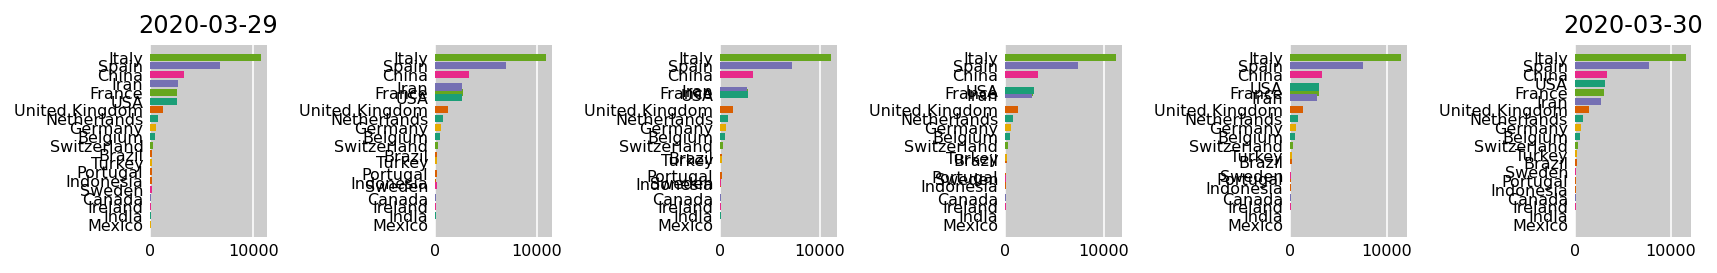

In [23]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-29')
ax_array[-1].set_title('2020-03-30');

A transição do dia seguinte está plotada abaixo.

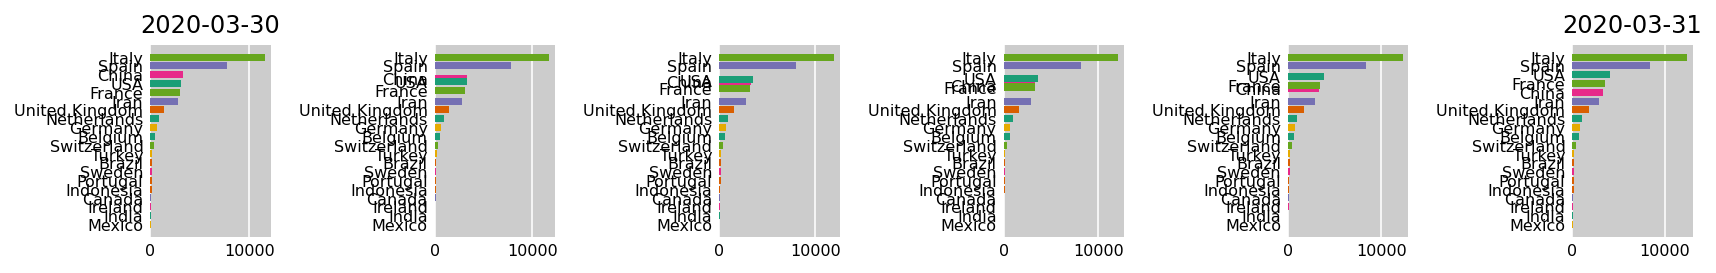

In [24]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-30')
ax_array[-1].set_title('2020-03-31');

Escreva uma função para preparar todos os dados


Podemos copiar e colar o código acima em uma função para automatizar o processo 

de preparação de quaisquer dados para a corrida do gráfico de barras. Em 

seguida, use-o para criar os dois DataFrames finais necessários para plotagem.

In [25]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2722.8,2.0,NaN,NaN,NaN,20.4,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2728.6,2.0,NaN,NaN,NaN,21.8,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2734.4,2.0,NaN,NaN,NaN,23.2,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2740.2,2.0,NaN,NaN,NaN,24.6,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_rank_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Animação

---



Agora estamos prontos para criar a animação. Cada linha representa um único 

quadro em nossa animação e passará lentamente a localização e a largura do 

valor y das barras de um dia para o outro.


A maneira mais simples de fazer animação no matplotlib é usar FuncAnimation. 

Você deve definir uma função que atualize os eixos do matplotlib em cada 

quadro. Como o objeto axes mantém todas as barras anteriores, as removemos no 

início da updatefunção. O restante da função é idêntico à plotagem de cima. 

Essa função receberá o índice do quadro como um número inteiro. Também 

definimos o título para ter a data atual.


Opcionalmente, você pode definir uma função que inicialize os eixos. Abaixo, 

initlimpa os eixos anteriores de todos os objetos e redefine suas boas 

propriedades.

Passe a figura (contendo seus eixos), o updatee initfunções, eo número de 

quadros para FuncAnimation. Também passamos o número de milissegundos entre 

cada quadro, que é usado ao criar HTML. Usamos 100 milissegundos por quadro, 

equivalente a 500 por dia (meio segundo).


A figura e os eixos são criados separadamente abaixo para que eles não sejam 

impressos em um notebook Jupyter, o que acontece automaticamente se você ligar 

plt.subplots.

In [0]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

**Retorne o HTML da animação ou salve no disco**

Chame o to_html5_videométodo para retornar a animação como uma string HTML e, 

em seguida, incorpore-a ao notebook com a ajuda do IPython.displaymódulo.

In [28]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

Você pode salvar a animação em disco como um arquivo mp4 usando o savemétodo 

Como temos uma initfunção, não precisamos nos preocupar em limpar nossos eixos 

e redefinir os limites. Isso fará por nós.

In [29]:
#Salvado a apresentação
anim.save('/content/drive/My Drive/GRAFICO_CORRIDA/covid19.mp4')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

***Usando bar_chart_race***

Eu criei o bar_chart_racepacote python para automatizar esse processo. Ele cria 


corridas de gráfico de barras a partir de DataFrames de pandas largos. Instale 

com      pip install bar_chart_race.

In [30]:
!pip install bar_chart_race

In [0]:
import bar_chart_race as bcr

In [32]:
html  = bcr.bar_chart_race(df, figsize=(8, 2.5), title='COVID-19 Mortes por país')
HTML(html)


**Clauder Noronha de Carvalho**